In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import pandas_ta


from sklearn import metrics
from sklearn import preprocessing


In [2]:
#Read data for Tesla stock from beginning of 2019 until now from yahoo to dataframe
df = web.DataReader('TSLA',data_source = 'yahoo', start='2019-01-01',end='2021-11-01') 
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 715 entries, 2019-01-02 to 2021-11-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       715 non-null    float64
 1   Low        715 non-null    float64
 2   Open       715 non-null    float64
 3   Close      715 non-null    float64
 4   Volume     715 non-null    float64
 5   Adj Close  715 non-null    float64
dtypes: float64(6)
memory usage: 39.1 KB


In [4]:
#Keep values for adjusted close
df = df[['Adj Close']]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 715 entries, 2019-01-02 to 2021-11-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  715 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


,Adj Close
Date,
2019-01-02,62.023998
2019-01-03,60.071999
2019-01-04,63.537998
2019-01-07,66.991997
2019-01-08,67.070000


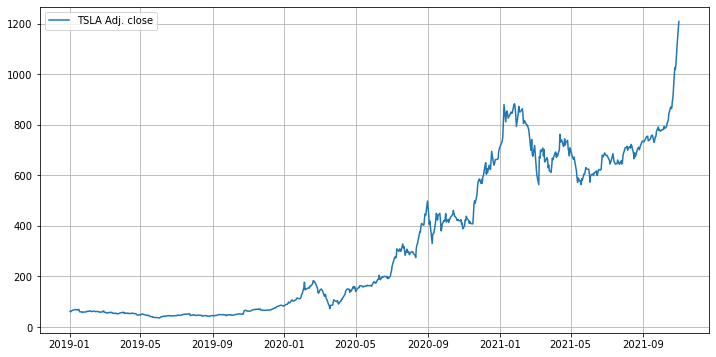

In [5]:
#Plot adj. close values
plt.figure(figsize=(12, 6))
plt.plot(df, label='TSLA Adj. close')
plt.legend()
plt.grid()
plt.show()

In [6]:
#Calculate and append 20-day exponential moving average
df.ta.ema(close='adj Close', length=20, append=True)
df.head(20)

,Adj Close,EMA_20
Date,,
2019-01-02,62.023998,NaN
2019-01-03,60.071999,NaN
2019-01-04,63.537998,NaN
2019-01-07,66.991997,NaN
2019-01-08,67.070000,NaN
2019-01-09,67.706001,NaN
2019-01-10,68.994003,NaN
2019-01-11,69.452003,NaN
2019-01-14,66.879997,NaN


In [7]:
#Remove first 19 (NaN) entries
df = df.iloc[19:]
df.head(10)
#Reset index/move date to column
df.reset_index(inplace=True)
df.head()

,Date,Adj Close,EMA_20
0,2019-01-30,61.754002,63.813600
1,2019-01-31,61.403999,63.584114
2,2019-02-01,62.442001,63.475342
3,2019-02-04,62.577999,63.389880
4,2019-02-05,64.269997,63.473701


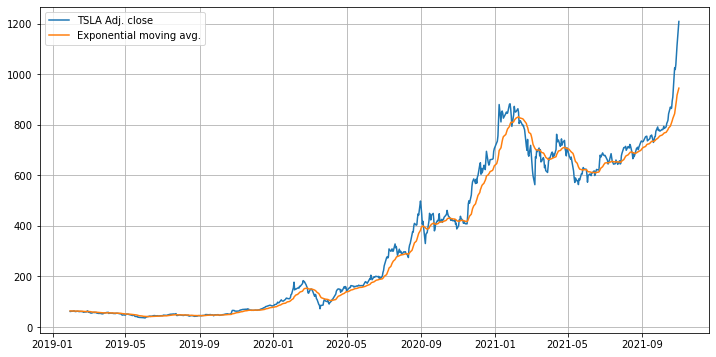

In [23]:
#Plot 20-day EMA against adjusted close
plt.gcf().set_size_inches(12, 6, forward=True)
plt.plot(df['Date'], df['Adj Close'], label='TSLA Adj. close')
plt.plot(df['Date'], df['EMA_20'], label='Exponential moving avg.')
plt.legend()
plt.grid()

In [69]:
#Split values for adj. close and EMA into train and test sets (90/10)
test_ratio = 0.1
training_ratio = 1 - test_ratio

train_size = int(training_ratio * len(df))
test_size = int(test_ratio * len(df))
print("train_size: " + str(train_size))
print("test_size: " + str(test_size))

y_train = df[:train_size][['Date', 'Adj Close', 'EMA_20']]
y_test = df[train_size:][['Date', 'Adj Close', 'EMA_20']]
x_train = np.array(df[:train_size].index).reshape(-1, 1)
x_test = np.array(df[train_size:].index).reshape(-1, 1)
x = np.array(df.index).reshape(-1, 1)

train_size: 626
test_size: 69


In [88]:
#Train model using sklearn.linear_model.LinearRegression, make predictions
lr = LinearRegression()
lr.fit(x_train, y_train['EMA_20'])
y_pred = lr.predict(x_test)
y_test1=np.array(y_test['Adj Close']).reshape(1,-1)
print(y_pred)
print(y_test1)
print('R squared:', lr.score(y_test1, y_pred))

[695.32558301 696.63727756 697.94897212 699.26066668 700.57236124
 701.8840558  703.19575036 704.50744492 705.81913948 707.13083404
 708.4425286  709.75422316 711.06591772 712.37761228 713.68930684
 715.0010014  716.31269596 717.62439052 718.93608508 720.24777964
 721.5594742  722.87116876 724.18286332 725.49455788 726.80625244
 728.117947   729.42964155 730.74133611 732.05303067 733.36472523
 734.67641979 735.98811435 737.29980891 738.61150347 739.92319803
 741.23489259 742.54658715 743.85828171 745.16997627 746.48167083
 747.79336539 749.10505995 750.41675451 751.72844907 753.04014363
 754.35183819 755.66353275 756.97522731 758.28692187 759.59861643
 760.91031098 762.22200554 763.5337001  764.84539466 766.15708922
 767.46878378 768.78047834 770.0921729  771.40386746 772.71556202
 774.02725658 775.33895114 776.6506457  777.96234026 779.27403482
 780.58572938 781.89742394 783.2091185  784.52081306 785.83250762]
[[ 657.61999512  644.7800293   646.97998047  677.34997559  687.20001221
   

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 70)

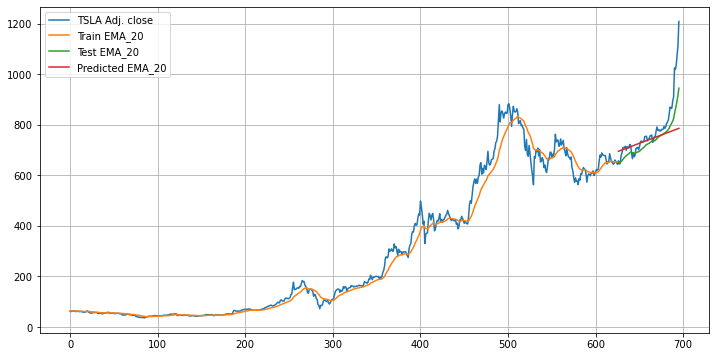

In [71]:
#Plot results
plt.gcf().set_size_inches(12, 6, forward=True)
plt.plot(x, df['Adj Close'], label='TSLA Adj. close')
plt.plot(x_train, y_train['EMA_20'], label='Train EMA_20')
plt.plot(x_test, y_test['EMA_20'], label='Test EMA_20')
plt.plot(x_test, y_pred, label='Predicted EMA_20')
plt.legend()
plt.grid()